In [13]:
import urllib.request
import json

client_id = "6NOiTOFoq78C7S2etK2W"
client_secret = "wU7EoECUIM"

category = 'news'
base = "https://openapi.naver.com/v1/search"
node = "/%s" %category

text = input("검색어를 입력하세요: ")
sort_method = input("검색 결과 정렬 방법을 입력하세요(1:정확도순, 2:최신순) ")
print("\n")

if sort_method == '1':
    sorting = "sim"
else :
    sorting = 'date'
    
def make(start, display):
    parameters = "?query=%s&start=%s&display=%s&sort=%s" %(urllib.parse.quote(text), start, display, sorting)
    url = base + node + parameters
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    return request

response = urllib.request.urlopen(make(1,100))
rescode = response.getcode()
i = 1
cnt = 0
if(rescode == 200):
    response_body = response.read()
    data = json.loads(response_body)
    #print("\n")
    for cnt in range(0, 10):
        for head in data["items"]:
            print("[%d]" %(i), end=" ")
            print(head["title"])
            i = i+1
    print("\n전체 검색: %d 건" % (data["total"]))
    print("가져온 데이터 : %d 건" % (i-1))
    #print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

검색어를 입력하세요: 월드컵
검색 결과 정렬 방법을 입력하세요(1:정확도순, 2:최신순) 2


[1] 손흥민, 시즌 끝내고 귀국...눈물고개 웃음고개 함께 넘어온 &apos;캡틴&apos;
[2] 콜린 벨호, <b>월드컵</b> 출정식 상대는 아이티···7월8일 국내 마지막 평가전
[3] 쿠팡플레이 자체 멤버십으로 수익성 높일 채비, ‘쿠플클럽’ 어떻게 나올까
[4] 파리행 티켓 10장 품에…한국, 장애인사격<b>월드컵</b> 우승
[5] 한국 장애인사격, 창원 <b>월드컵</b>대회서 종합 1위
[6] 우여곡절 끝 &apos;두 자릿수 득점&apos; 한 손흥민...시즌 끝내고 평가전 위해 귀국
[7] &apos;EPL 7시즌 연속 두자릿수 득점·100호골&apos; 손흥민, 시즌 마치고 귀국
[8] &apos;안나♥&apos; 박주호, &apos;슈돌&apos; 살린 장본인? &quot;내가 아닌 건나블리가…&quot;(&apos;리춘수&apos;)
[9] 손흥민, 인천공항 통해 입국...손흥민의 22-23시즌은 어땠나
[10] 득점왕 그 이후…악재·경사 속 &apos;파란만장&apos; 시즌 끝 손흥민 귀국(종합)
[11] 현대차그룹, 2030년까지 FIFA <b>월드컵</b> 후원 연장
[12] 어려움 극복한 시즌 끝 손흥민, 팬들 환대 받으며 귀국…두 손 들어 감사 인사
[13] &quot;호날두는 역대 최고, 포르투갈 사람이라면 자랑스러워해야&quot; 전 에이전트의 주...
[14] &apos;亞 역사 쓴&apos; 손흥민, 환대 속에 밝은 미소로 귀국...팬들에게 허리 숙여 인사...
[15] `영광과 상처` 안고 돌아온 손흥민…&quot;페루전요? 기대하세요&quot;
[16] 익산시 육상·펜싱 연이은 선전...전국 최강 입증
[17] 다사다난했던 시즌 마무리 한 손흥민, 팬들 환대 받으며 귀국
[18] [화촉]이용진 전 의협 기획부회장 장녀
[19] [IN 인천공항] &apos;에이스&apos; 손흥민, 귀국...&apos;7시즌 연속 공격

/var/folders/yw/97hrdtxj2l51l66m4xkn4p3c0000gn/T/ipykernel_16792/265516400.py:29: RuntimeWarning: invalid value encountered in long_scalars
  temp = np.sum(np.array(line[3:10], dtype=int)) / int(line[2])


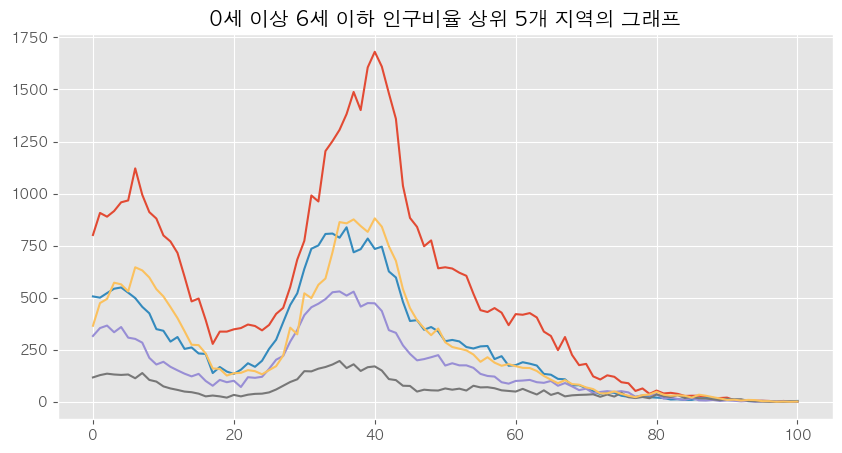

In [18]:
import matplotlib.pyplot as plt
import csv
import numpy as np

plt.rcParams['font.family'] = 'AppleGothic'##한글 설정 in Mac
plt.rcParams['axes.unicode_minus'] = False

    
f = open('/Users/handrakes/bigdata/age_no_comma.csv', encoding='cp949') # 파일 불러오기 
data = csv.reader(f)
next(data)
data = list(data) # 연령별 인구를 data에 저장.
max_ratio = 0 # 최대값을 지정할 변수 초기화
result_name = "" # 최대값을 갖는 지역의 이름을 저장할 변수 생성 및 초기화
result = 0 # 최대값을 갖는 지역의 연령대별 인구 비율을 저장할 배열 생성 및 초기화
find = list() # 1~5까지의 데이터 저장
for row in data:
    if int(row[2]) == 0: 
        continue
    tmp = np.sum(np.array(row[3:10], dtype=int)) / int(row[2]) # tmp는 해당 지역의 0~6세의 인구 비율
    find.append(tmp)

find.sort(reverse = True) #오름차순으로 정렬
top5 = find[0:5]
i = 0

tops = []
for line in data:
    temp = np.sum(np.array(line[3:10], dtype=int)) / int(line[2])
    for x in range(0,5):
        if(top5[x] == temp):
            #tops_name.append[line[0]]
            tops.append(np.array(line[3:], dtype=int))
            i += 1
            if(i == 5): break
        
'''
#print('%s지역의 0세 이하 6세 이하의 인구 비율: %.1f%%' %(result_name, max_ratio*100)) 
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title('%s 지역의 인구 구조' % result_name)
plt.plot(result)
plt.show()
'''

plt.style.use('ggplot')
plt.figure(figsize = (10,5))
for k in range(0,5):
    plt.plot(tops[k])
plt.title("0세 이상 6세 이하 인구비율 상위 5개 지역의 그래프")
plt.show()

<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>
국가 코드를 입력하세요(중국 : 112 / 일본 : 130 / 미국 : 275) :112
데이터를 몇 년부터 수집할까요? : 2012
데이터를 몇 년까지 수집할까요? : 2021


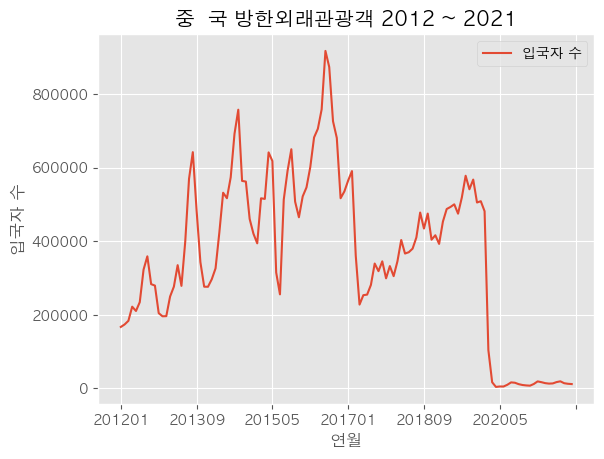

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib.request
import json


plt.rcParams['font.family'] = 'AppleGothic' ##한글 설정 in Mac
plt.rcParams['axes.unicode_minus'] = False

print("<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>")
code = input("국가 코드를 입력하세요(중국 : 112 / 일본 : 130 / 미국 : 275) :")
start = int(input("데이터를 몇 년부터 수집할까요? : "))
end = int(input("데이터를 몇 년까지 수집할까요? : "))

result = []

key = 'GCNSYCmV12A4C7yhtoFkmuRDz0TKcTtHNPE+puf9kSnqfIMh20vvAeagCKlOZQJZ/TkRibEGCRtMUPqdKn7sZw=='
url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'

for year in range(start, end + 1):
    for month in range(1, 13):
        yyyymm = "{0}{1:0>2}".format(str(year), str(month))
        params = {'serviceKey' : key, 'YM' : yyyymm, 'NAT_CD' : code, 'ED_CD' : 'E', '_type' : 'json' }
        response = requests.get(url, params = params)
        jsonData = response.json()
        if( jsonData['response']['header']['resultMsg'] == 'OK'):
            natCd = jsonData['response']['body']['items']['item']['natCd']
            natName = jsonData['response']['body']['items']['item']['natKorNm']
            natName = natName.replace('',"")
            num = jsonData['response']['body']['items']['item']['num']
            
            result.append([natName, natCd, yyyymm, num])

columns = ["입국자국가","국가코드","입국연월","입국자 수"]
result_df = pd.DataFrame(result, columns = columns)

#plt.rc('font', family = 'Malgun Gothic')
result_df1 = result_df.drop(['입국자국가', '국가코드'], axis = 1)

result_df1.plot(x = '입국연월', y = '입국자 수')
title = '%s 방한외래관광객 %s ~ %s' %(natName, start, end)
plt.title(title)
plt.xlabel("연월")
plt.ylabel("입국자 수")
plt.show()